**<span style="color:red">Namn och CID p√• gruppmedlemmar: </span>**

FYLL I H√ÑR


In [118]:
import numpy as np # Standard paket f√∂r att hantera matamatik och arrayer
import matplotlib.pyplot as plt # Standard paket f√∂r att plotta figurer
plt.style.use("ggplot")
import scipy.io as io # Vi l√•nar funktionen 'io' fr√•n scipy f√∂r att smidigt kunna importera .mat-filer

In [119]:
# Funktioner f√∂r HUPP:en

def fft2c(x):
    '''
    2D Fourier transform
    
    Denna √§r perfekt som den √§r. Bara att anv√§nda!
    '''
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))

def ifft2c(x):
    '''
    2D inverse Fourier transform
    
    Denna √§r perfekt som den √§r. Bara att anv√§nda!
    '''
    return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))


# Uppgift 1 - Skriv en Python-funktion som implementerar PAS!

#### Utg√• fr√•n skelletkoden nedan. Funktionen √§r ej klar! Byt ut alla '.x.' f√∂r att f√• PAS funktionen att fungera.

In [120]:
def PAS(E1, L, N, a, lam0, n):
    '''
    Funktion f√∂r att propagera E1 str√§ckan L genom PAS
    '''
    
    # Varje sampelpunkt i k-planet motsvarar en plan v√•g med en viss riktning [kx,ky,kz]
    delta_k =2*np.pi/(N*a)                                            # Samplingsavst√•nd i k-planet
    
    kx      = np.arange(-(N/2)*delta_k, (N/2)*delta_k, delta_k) # Vektor med samplingspunkter i kx-led
    ky      = kx                                                # och ky-led
    
    KX, KY  = np.meshgrid(kx,ky)                                # k-vektorns x- resp y-komponent i varje 
                                                                # sampelpunkt i k-planet
    
    k =2*np.pi*n/lam0                                             # k-vektorns l√§ngd (skal√§r) f√∂r en plan v√•g i ett material med brytningsindex n
    
    KZ = np.sqrt(k**2-KX**2-KY**2, dtype=complex)                   # k-vektorns z-komponent i varje sampelpunkt.
                                                       # dtype=complex till√•ter np.sqrt att evaluera till ett komplext tal
    
    fasfaktor_propagation = np.exp(1j*KZ*L) # Faktor f√∂r varje sampelpunkt i k-planet
                                           # multas med f√∂r att propagera str√§ckan L i z-led 

    A  = a**2/(2*np.pi)**2*fft2c(E1)                # Planv√•gsspektrum i Plan 1
    B  = A*fasfaktor_propagation        # Planv√•gsspektrum i Plan 2 (Planv√•gsspektrum i Plan 1 multat med fasfaktorn f√∂r propagation)
    E2 = N**2*delta_k**2*ifft2c(B)
    
    return E2

# Uppgift 2 - Gauss bleibt Gauss (gammalt tyskt ordspr√•k: Gauss f√∂rblir Gauss)

#### Kolla att en gaussisk str√•le f√∂rblir gaussisk vid propagation (bara $ùúî$ √§ndras) √§nda till fj√§rrf√§ltet genom att kolla hur f√§ltet ser ut p√• n√•gra olika avst√•nd fram till $ùêø=ùëì$ (l√§mplig fokall√§ngd f√∂r linsen f√∂re Plan 1 kan vara $ùëì=10$ cm och $1/e^2$-radien p√• infallande f√§lt $ùúî_{in}=1$ mm, se PDF f√∂r $ùúî$-definition). <span style="background-color:yellow">Beh√∂ver ej redovisas!</span>

In [121]:
# Propagera f√§lt med PAS
# GL√ñM EJ ATT √ÑNDRA VARIABLER MED '.x.'

N               = 2**10                 # NxN √§r antalet samplade punkter (rekommenderad storlek N=1024)
sidlaengd_Plan1 = 4e-3                  # Det samplade omr√•dets storlek (i x- eller y-led) i Plan 1 (rekommenderad storlek 4 mm)
a               = sidlaengd_Plan1/N     # Samplingsavst√•nd i Plan 1 (och Plan 2 eftersom vi anv√§nder PAS)
L               = 100e-3                # Propagationsstr√§cka (dvs avst√•nd mellan Plan 1 och 2)

lambda_noll = 633e-9                    # Vakuumv√•gl√§ngd f√∂r r√∂tt ljus fr√•n en HeNe-laser
n_medium    = 1                         # Brytningsindex f√∂r medium mellan Plan 1 och 2
k           = 2*np.pi*n_medium/lambda_noll                     # K-vektorns l√§ngd 

In [122]:
# Definera koordianter i plan 1
x = np.arange(-(N/2)*a, (N/2)*a, a)     # Vektor med sampelpositioner i x-led
y = x                                   # och y-led

X, Y = np.meshgrid(x, y)                # Koordinatmatriser med x- och y-v√§rdet i varje sampelposition
R    = np.sqrt(X**2 + Y**2)             # Avst√•ndet till origo f√∂r varje sampelpunkt

In [123]:
# Definera lins och cirkul√§r aperatur
f_lins = 100e-3                         # Fokall√§ngd p√• linsen f√∂re Plan 1
T_lins = np.exp(-1j*k*R**2/(2*f_lins))  # Transmissionsfunktion f√∂r en lins (linsen √§r TOK)

D_aperture = 2e-3                       # Diameter f√∂r apertur
T_aperture = R < (D_aperture/2)         # Transmissionsfunktion f√∂r en cirkul√§r apertur ("pupill")

In [124]:
# Definera f√§lt i plan 1
# GL√ñM EJ ATT √ÑNDRA VARIABLER MED '.x.'

omega1      = 1e-3                      # 1/e2-radie (f√∂r intensiteten, dvs 1/e-radie f√∂r amplituden) f√∂r infallande Gaussiskt f√§lt
E1_in_gauss = np.exp(-R**2/omega1**2)   # Infallande f√§lt: Gaussiskt med plana v√•gfronter och normalinfall (dvs konstant fas, h√§r=0)
E1_in_konst = np.ones(X.shape)          # Infallande f√§lt: Konstant i hela plan 1. np.ones(X.shape) ger en matris fylld med ettor som har samma storlek som X


E1_gauss    = E1_in_gauss*T_lins         # F√§ltet i Plan 1 (precis efter linsen) f√∂r gaussisk str√•le 
E1_cirkular = E1_in_konst* T_lins* T_aperture  # F√§ltet i Plan 1 (precis efter linsen) f√∂r konstant f√§lt som passerat genom cirkul√§r apertur


E1          = E1_cirkular               # V√§lj fall!

I1      = np.abs(E1)**2     # Intensiteten √§r prop mot kvadraten p√• f√§ltets amplitud (normalt struntar man i proportionalitetskonstanten)
I1_norm = I1/np.max(I1)     # D√• vi inte √§r intresserade av det absoluta v√§rdet av intensiteten s√• kan det vara trevligt att noramlizera intensiten innan vi plottar

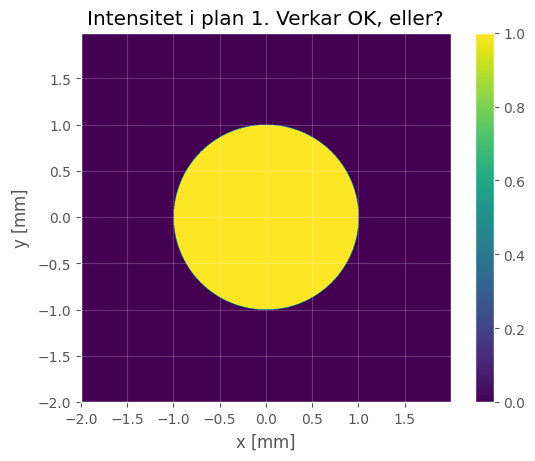

In [125]:
# Plotta intensitet i plan 1 
x_mm = x*1e3
y_mm = y*1e3

plt.figure()
image = plt.imshow(I1_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 1. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

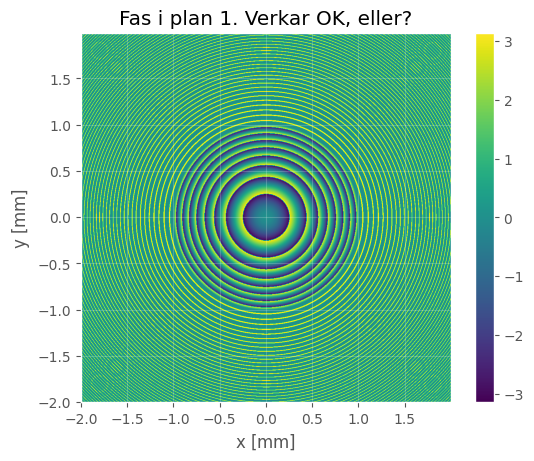

In [126]:
# Plotta fas i plan 1
plt.figure()
image = plt.imshow(np.angle(E1), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 1. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

In [127]:
# Propagera till plan 2
# GL√ñM EJ ATT √ÑNDRA VARIABLER MED '.x.'

E2      = PAS(E1, L, N, a, lambda_noll, n_medium)         # Propagera med v√•r PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 f√∂r att plotta

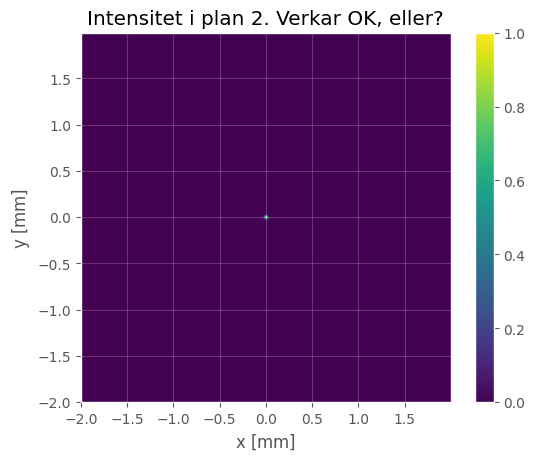

In [128]:
# Plotta intensitet i plan 2 
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

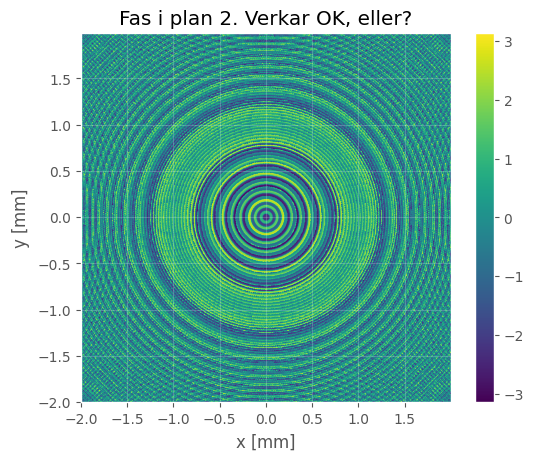

In [129]:
# Plotta fas i plan 2
plt.figure()
image = plt.imshow(np.angle(E2), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

# Uppgift 3 - Gauss-str√•lens minsta spotsize

#### Kolla tumregeln om minsta spotsize, $D_{spot}=ùê∂ \frac{ùúÜ}{D_{start}} ùêø$, d√§r $ùê∂‚âà1$. G√∂r det f√∂r specialfallet gaussisk str√•le ($ùúî_{in}=1$ mm) som fokuseras med hj√§lp av lins med $ùëì=10$ cm respektive $ùëì=1$ m. F√∂r definition av str√•ldiametern $ùê∑$, anv√§nd i b√•da planen $ùê∑=2ùúî$, d√§r $ùúî$ √§r $1/e^2$-radien f√∂r intensiteten i respektive plan.

In [130]:
# KOD
# Propagera till plan 2
# GL√ñM EJ ATT √ÑNDRA VARIABLER MED '.x.'

f_1 = 10*1e-2
f_2 = 1

# Definiera lins             
T_lins1 = np.exp(-1j*k*R**2/(2*f_1)) 

E1    = E1_in_gauss*T_lins1*T_aperture 

E2      = PAS(E1, f_1, N, a, lambda_noll, n_medium)         # Propagera med v√•r PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 f√∂r att plotta

In [131]:

def coolshit(target_value, matrix):
    indices = np.where(matrix == target_value)
    
    diff_matrix = np.abs(matrix - target_value)
    y, x = np.unravel_index(np.argmin(diff_matrix), matrix.shape)
    
    element_X = X[y, x]
    element_Y = Y[y, x]
    element_I = I2_norm[y, x]
    vec1 = np.array([element_X, element_Y])
    return vec1
vec = coolshit(1, I2_norm) - coolshit(1/np.exp(2),I2_norm)
D_norm = 2*np.linalg.norm(vec)
C = D_norm * omega1 *2 /(lambda_noll*f_1)
print(C)

1.7970255453397819


(1024, 1024)


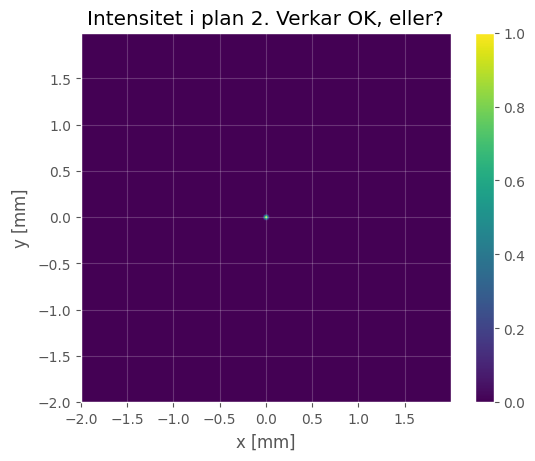

In [132]:
# Plotta intensitet i plan 2 
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)
print(np.shape(X))



In [133]:
T_lins2 = np.exp(-1j*k*R**2/(2*f_2)) 

E1    = E1_in_gauss*T_lins2*T_aperture 

E2      = PAS(E1, f_2, N, a, lambda_noll, n_medium)         # Propagera med v√•r PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 f√∂r att plotta

In [134]:
vec = coolshit(1, I2_norm) - coolshit(1/np.exp(2),I2_norm)
D_norm = np.linalg.norm(vec)
C = D_norm * omega1 *2 /(lambda_noll*f_2)
print(C)

0.9252401665675024


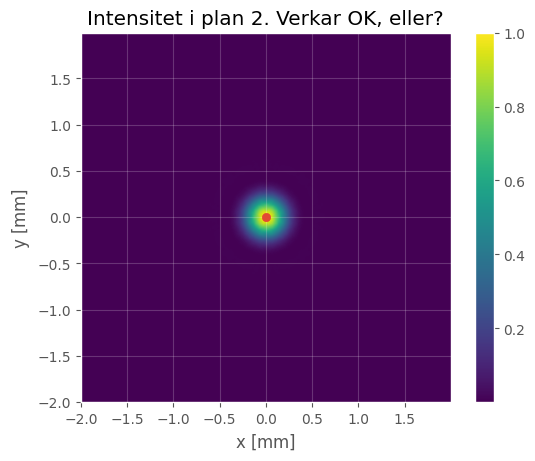

In [135]:
x_p, y_p = coolshit(1, I2_norm)
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)
plt.scatter(x_p, y_p)
plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)


#### **Vad blir det mer exakta v√§rdet p√• $ùê∂$ f√∂r den gaussiska str√•len med den valda definitionen av $ùê∑$?**

*SVARA H√ÑR*

# Uppgift 4 - Cirkul√§ra str√•lens minsta spotsize

#### G√∂r samma sak som i uppgift 3 fast nu ska f√§ltet i Plan 1 ha konstant intensitet i ett cirkul√§rt tv√§rsnitt (diameter $D_{start}$), och $D_{spot}$ i Plan 2 definieras som ‚Äùinnersta m√∂rka ringens‚Äù diameter (vilket √§r en ganska gener√∂s definition av spotdiameter, s√• $ùê∂$ b√∂r bli klart st√∂rre √§n 1).

In [136]:
# KOD

#### **Vad blir det mer exakta v√§rdet p√• $ùê∂$ f√∂r den cirkul√§ra str√•len och de valda definitionerna av $ùê∑$?**

*SVARA H√ÑR*

#### **Kan du i n√•got av fallen $ùëì= 10$ cm eller $ùëì=1$ m se svaga tecken p√• numeriska fel i simuleringen av intensitetsf√∂rdelningen i fj√§rrf√§ltet?**

*SVARA H√ÑR*

# Uppgift 5 - M√∂t en annan medlem i gauss-str√•lens storfamilj!

#### Det finns en hel lycklig familj med f√§lt som delar gausstr√•lens egenskap att inte √§ndra form (f√∂rutom storlek) n√§r de propagerar: s√• kallade *hermite-gaussiska str√•lar*. En av dessa str√•lar f√•s helt enkelt genom att multiplicera den (vanliga) gaussiska str√•len i startplanet med $ùë•$. Kolla att detta inf√§lt ocks√• h√•ller formen vid propagation √§nda till fj√§rrf√§ltet! <span style="background-color:yellow">Beh√∂ver ej redovisas!</span>

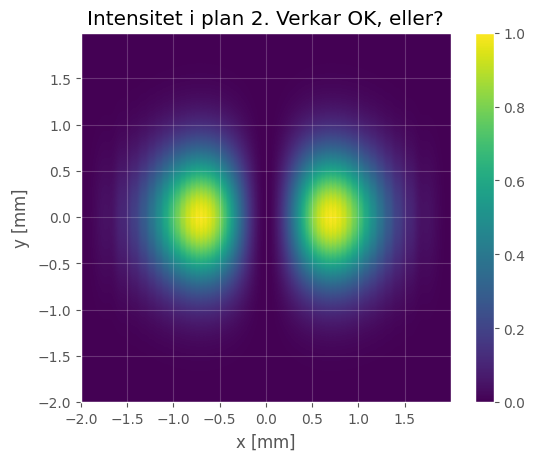

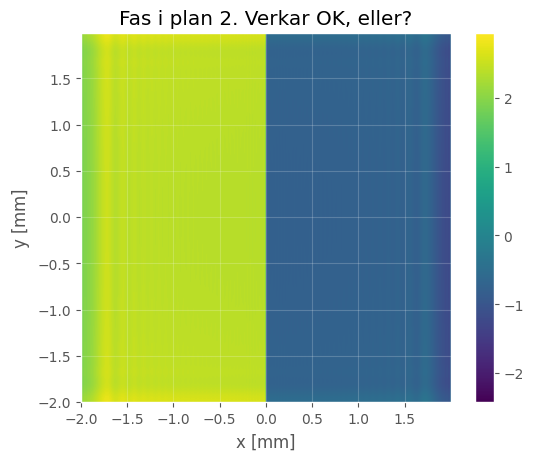

In [137]:

T_lins2 = np.exp(-1j*k*R**2/(2*f_2)) 

E1_hermitgauss = E1_in_gauss*X

E2      = PAS(E1_hermitgauss, 10e-2, N, a, lambda_noll, n_medium)         # Propagera med v√•r PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)  

plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

plt.figure()
image = plt.imshow(np.angle(E2), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

#Vi har kollat med m√•nga fokall√§ngder mellan 0 och 1 meter och formen bibeh√•lls.

# Uppgift 6 - Dubbla budskap

In [138]:
# Ladda in DOE s√•h√§r!
DOE = np.flip(io.loadmat('T_DOE_gen2.mat'))["T_DOE_gen2"]

print(DOE)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
# Skapa det elektriska f√§ltet som tr√§ffar √∂gat och propagera med pas
T_lins3 = np.exp(-1j*k*R**2/(2*0.02))
E1_in = E1_in_konst* T_lins3*DOE
E2 = PAS(E1_in, 0.02, N, a, 633e-9, 1)

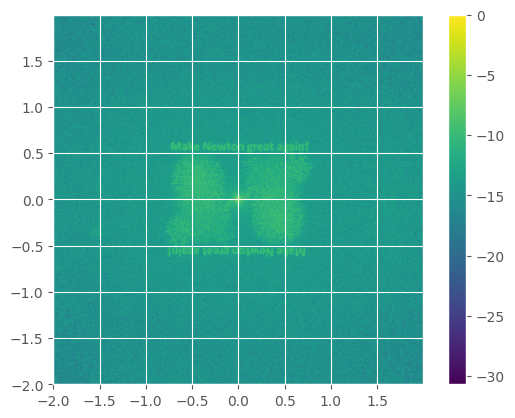

In [140]:
# F√§ltet som har propagerats genom DOE och 'de vises lins' √§r smidigt att
# plotta i logaritmisk skala f√∂r att bilden ska vara tydlig.
# Allts√• plotta f√§ltet i plan 2 s√• h√§r!
I2      = np.abs(E2)**2    
I2_norm = np.log(I2/np.max(I2))  # Log av den normaliserade intensiteten i plan 2

x_mm = x*1e3
y_mm = y*1e3

plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

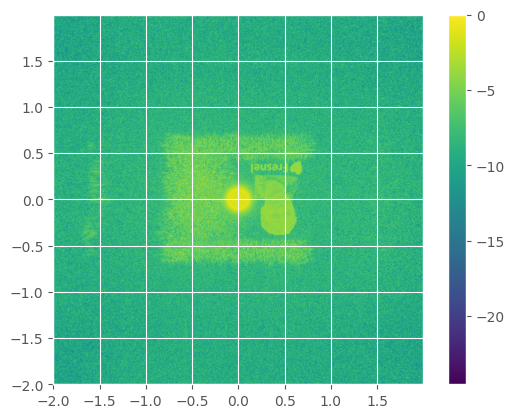

In [143]:
T_lins_vise = np.exp(-1j*k*R**2/(2*0.15))
E1_in = E1_in_konst* T_lins3*DOE*T_lins_vise
E2 = PAS(E1_in, 0.02, N, a, 633e-9, 1)

I2      = np.abs(E2)**2    
I2_norm = np.log(I2/np.max(I2))  # Log av den normaliserade intensiteten i plan 2

x_mm = x*1e3
y_mm = y*1e3

plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

#### **Vilket √§r det ofarliga meddelandet i den bifogade DOE-koden av generation 2-typ?** 

Make Newton great again!

#### **Och vilken styrka kr√§vs p√• ‚Äùde vises lins‚Äù f√∂r att l√§sa det farliga budskapet i samma kod? Testa dig fram med olika v√§rden p√• styrkan hos de vises lins tills du kan urskilja budskapet.**

<3Fresnel